In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from ocrdgen.font.font import FontManager
from ocrdgen.image.background import BgManager
from pathlib import Path
import numpy as np
from PIL import ImageDraw, Image
from ocrdgen.ops import boxes_ops
import cv2 as cv
# from collections import OrderedDict

In [4]:
from ocrdgen.drawer.base import BaseDrawer
from ocrdgen.drawer.word import WordDrawer
from ocrdgen.drawer.text import TextDrawer

In [5]:
fm = FontManager(font_dir=Path('data/font/font_files'), font_list_file=Path('data/font/font_list.txt'), font_size=20)
bgm = BgManager(bg_dir=Path('data/bg/'))

In [122]:
img = bgm.get_bg()
np_img = np.array(img)
font, _, _ = fm.get_font()

fm.get_font

In [122]:
draw = ImageDraw.Draw(img)
text = "Kota Mataram Jaya"
text_multi = "'Computer Vision is such a\nfast-paced field that\neveryday loads of new\ntechniques and algorithms\nare presented in\ndifferent conferences and\njournals. When it comes\nto object detection,\ntheoretically you learn\nabout multitudes of\nalgorithms like Faster-\nrcnn, Mask-rcnn, Yolo,\nSSD, Retinenet, Cascaded-\nrcnn, Peleenet, and\nEfficientDet. This list\nis never-ending!'"
label = "Field"
xy = (10,10)

In [123]:
text_long = "Computer Vision is such a fast-paced field that everyday loads of new techniques and algorithms are presented in different conferences and journals. When it comes to object detection, theoretically you learn about multitudes of algorithms like Faster-rcnn, Mask-rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet, and EfficientDet. This list is never-ending!"

In [124]:
text_long

'Computer Vision is such a fast-paced field that everyday loads of new techniques and algorithms are presented in different conferences and journals. When it comes to object detection, theoretically you learn about multitudes of algorithms like Faster-rcnn, Mask-rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet, and EfficientDet. This list is never-ending!'

In [9]:
# draw.textbbox(xy, text, font, align="left")

In [50]:
# draw.multiline_textbbox(xy, text_multi, font, align="center")

In [118]:
td = TextDrawer(img, font, text_long, label, (200,100), align="right", anchor="la", auto_wrap=True, max_width=500, max_height=150)

In [119]:
td._multiline_coord()

{'xy': [(222, 100), (200, 123)],
 'width': [373, 395],
 'max_width': 395,
 'max_height': 146,
 'line_spacing': 23}

In [120]:
data, image = td.draw(draw_bbox=False, draw_wordbbox=False, draw_charbbox=True)

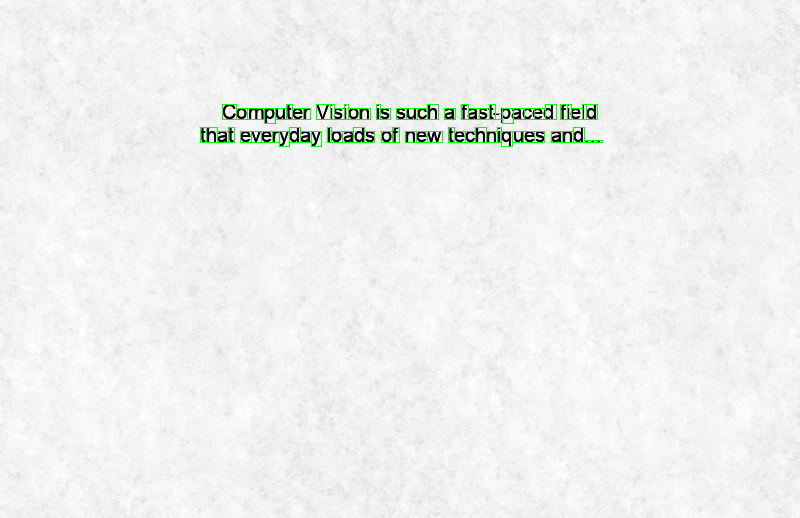

In [121]:
image

In [94]:
dict(data.words[5])

{'seq_id': 5,
 'text': 'fast-paced',
 'bbox': [400, 104, 493, 123],
 'chars': [CharBox(seq_id=0, char='f', bbox=[400, 104, 7, 15]),
  CharBox(seq_id=1, char='a', bbox=[407, 108, 11, 11]),
  CharBox(seq_id=2, char='s', bbox=[418, 108, 10, 11]),
  CharBox(seq_id=3, char='t', bbox=[428, 104, 6, 15]),
  CharBox(seq_id=4, char='-', bbox=[434, 113, 7, 6]),
  CharBox(seq_id=5, char='p', bbox=[441, 108, 11, 15]),
  CharBox(seq_id=6, char='a', bbox=[452, 108, 11, 11]),
  CharBox(seq_id=7, char='c', bbox=[463, 108, 10, 11]),
  CharBox(seq_id=8, char='e', bbox=[473, 108, 11, 11]),
  CharBox(seq_id=9, char='d', bbox=[484, 104, 11, 15])],
 'label': None,
 'line': 0}

In [207]:
lines = td.textwrap(text, max_width=400, max_height=250)
multi_text = "\n".join(lines)
# multi_text

lines

['Computer Vision is such a fast-',
 'paced field that everyday loads of',
 'new techniques and algorithms are',
 'presented in different conferences',
 'and journals. When it comes to',
 'object detection, theoretically...']

In [194]:
td._multiline_coord('Test\nTest')

{'xy': [(150, 100), (150, 123)],
 'width': [36, 36],
 'max_width': 36,
 'max_height': 146,
 'line_spacing': 23}

In [182]:
#calculate with max width how much character you can get


In [169]:
text = "Computer Vision is such a fast-paced field that everyday loads of new techniques and algorithms are presented in different conferences and journals. When it comes to object detection, theoretically you learn about multitudes of algorithms like Faster-rcnn, Mask-rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet, and EfficientDet. This list is never-ending!"

draw = ImageDraw.Draw(img)
draw.textlength(text, font=font)

char_size = draw.textsize("A", font=font, stroke_width=stroke_width)
space_size = draw.textsize(" ", font=font, stroke_width=stroke_width)

In [175]:
lines = td.textwrap(text, max_width=0)
multi_text = "\n".join(lines)

# multi_text
lines

['Computer Vision is such a fast-paced field that',
 'everyday loads of new techniques and algorithms are',
 'presented in different conferences and journals. When',
 'it comes to object detection, theoretically you learn',
 'about multitudes of algorithms like Faster-rcnn, Mask-',
 'rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet,',
 'and EfficientDet. This list is never-ending!']

In [171]:
import string
import textwrap
from textwrap import wrap

data = [draw.textlength(c, font=font) for c in string.ascii_letters]
line_width = max_width/(np.array(data).mean())
lines = wrap(text, width=line_width)

for line in lines:
    lw = draw.textlength(line, font=font)
    print(int(lw),'\t', line)
    
print(line_width)

231 	 Computer Vision is such a
174 	 fast-paced field that
199 	 everyday loads of new
233 	 techniques and algorithms
144 	 are presented in
225 	 different conferences and
213 	 journals. When it comes
167 	 to object detection,
194 	 theoretically you learn
169 	 about multitudes of
196 	 algorithms like Faster-
197 	 rcnn, Mask-rcnn, Yolo,
245 	 SSD, Retinenet, Cascaded-
173 	 rcnn, Peleenet, and
180 	 EfficientDet. This list
142 	 is never-ending!
25.70678201761162


In [137]:
space_size = draw.textsize(" ", font=font)
char_size = draw.textsize("P", font=font)
max_width/(char_size[0]+space_size[0])

int(max_width/15)

In [184]:
td.idraw.textsize("Test\nLine")

(24, 26)

In [182]:
td.textwrap(text, max_height=200)

['Computer Vision is such a fast-paced field that',
 'everyday loads of new techniques and algorithms are',
 'presented in different conferences and journals. When',
 'it comes to object detection, theoretically you learn',
 'about multitudes of algorithms like Faster-rcnn, Mask-',
 'rcnn, Yolo, SSD, Retinenet, Cascaded-rcnn, Peleenet,',
 'and EfficientDet. This list is never-ending!']

In [60]:
lines = []
clen = 0
temp_text = ""
words = []
for idx, txt in enumerate(text.split(" ")):
    txt_len = draw.textlength(txt, font=font) + draw.textlength(" ", font=font)
    if clen<max_width:
        words.append(txt)
        clen+=txt_len
    else:
        line = " ".join(words).strip()
        line_length = draw.textlength(line, font=font)
        # print(line_length)
        if line_length<max_width:
            lines.append(line)
            # line = ""
        else:
            line_length = draw.textlength(line, font=font)
            words = line.split(" ")
            poped = []
            while line_length>max_width:
                poped.append(words.pop())
                line = " ".join(words).strip()
                line_length = draw.textlength(line, font=font)
            
            poped.reverse()
            words = poped
            print(poped)
            print(line)
            print()
            lines.append(line)
        
        # print(line_length)
            
        clen=0
    
# lines = [line+"\n" for line in lines]
print(lines)

['fast-paced']
Computer Vision is such a

['new', 'techniques']
fast-paced that everyday loads of

['presented', 'in', 'different']
new techniques algorithms are

['journals.', 'When', 'it', 'comes', 'to', 'object']
presented in different and

['theoretically', 'you', 'learn', 'about', 'multitudes']
journals. When it comes to object

['multitudes', 'algorithms', 'like', 'Faster-rcnn,', 'Mask-rcnn,']
theoretically you learn about

['Faster-rcnn,', 'Mask-rcnn,', 'SSD,', 'Retinenet,', 'Cascaded-rcnn,', 'Peleenet,']
multitudes algorithms like

['Computer Vision is such a', 'fast-paced that everyday loads of', 'new techniques algorithms are', 'presented in different and', 'journals. When it comes to object', 'theoretically you learn about', 'multitudes algorithms like']


In [174]:
split_delimiter = " "
text = "Hai Kamu  Dimana?\nTest Baru"

In [32]:
# multiwords = [txt.strip() for txt in text.split(split_delimiter) if len(txt.strip())> 0]

In [33]:
# multiwords

In [53]:
td._multiline_split(text)

['Hai Kamu  Dimana?', 'Test Baru']

In [62]:
string = "\n"

In [64]:
bytes(string, "utf-8")

b'\n'